# Data Science Project: Predictive Analytics for Housing Price Trends

In this project, I analyzed the **House Prices: Advanced Regression Techniques** dataset from Kaggle. The goal was to build predictive models that estimate housing prices using features from the training set and generalize well to the test set.

There are two datasets: a training set with 1460 entries and a test set with 1459 entries. The training data includes the `SalePrice` (target), while the test data does not. My objective was to predict the `SalePrice` for the test data using machine learning models.
s

There are 7 steps in my analysis:

1.  Data Preprocessing
2.  Exploratory Data Analysis
3.  Feature Engineering
4.  Model Building and Evaluation
6.  Visualization
7.  Results

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Data Preprocessing

First, I need to read the dataset into pandas. 

In [4]:
# Import data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


The train dataset have 1460 rows and 81 columns, while the test dataset have 1459 rows and 80 columns. 
The "SalePrice" column, representing the target variable, is available only in the training dataset, while it is absent from the test dataset. Therefore, it is necessary to develop a machine learning model that can accurately predict the house sale prices using the remaining 80 feature columns.

Since the training and test datasets share identical columns, except for the "SalePrice" column, which is present only in the training dataset, they can be concatenated into a single dataset. This approach facilitates more efficient and consistent data preprocessing.

In [7]:
# Concatenate data
all = pd.concat([train, test], axis = 0)

In [8]:
all

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


As an initial step, it is essential to address missing values within the dataset. To do so, I will first identify which variables contain missing data.

In [9]:
# Identify missing columns
missing_cols = all.columns[all.isnull().any()]
len(missing_cols),missing_cols

(35,
 Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
        'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
        'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
        'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
        'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
        'SaleType', 'SalePrice'],
       dtype='object'))

The output indicates that there are 35 columns with more than one missing value. 
Since understanding the data types of these columns is crucial for selecting appropriate imputation strategies, I will now examine and present their respective data types.

In [10]:
all[missing_cols].dtypes

MSZoning         object
LotFrontage     float64
Alley            object
Utilities        object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinSF1      float64
BsmtFinType2     object
BsmtFinSF2      float64
BsmtUnfSF       float64
TotalBsmtSF     float64
Electrical       object
BsmtFullBath    float64
BsmtHalfBath    float64
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageCars      float64
GarageArea      float64
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType         object
SalePrice       float64
dtype: object

The data types of the columns with missing values are limited to two categories: `float64` and `object`. As these data types represent different kinds of features, numerical and categorical, they require distinct preprocessing approaches.

In this step, we encode all categorical features using LabelEncoder from sklearn.preprocessing.
Label encoding converts categorical string values into numeric values. This is necessary because most machine learning algorithms require numerical input.

In [11]:
# Encoding
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for col in all.select_dtypes(include='object').columns:          
    le = LabelEncoder()
    all[col] = le.fit_transform(all[col])
    label_encoders[col] = le

In this dataset, some categorical (`object`) columns contain missing values. However, it's important to note that these missing values do not represent data entry errors. Instead, they indicate the absence of a feature in the house.

When applying LabelEncoder, these NaN values are automatically treated as a unique category and assigned a numerical label, just like any other category. This is especially useful because:
* Most machine learning models require numerical inputs.
* Treating missing values as meaningful categories preserves important information about the presence or absence of certain features.
* This approach avoids dropping or imputing values that should logically remain distinct.

In [12]:
# Identify missing columns
missing_cols = all.columns[all.isnull().any()].tolist()
missing_cols

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'SalePrice']

Upon inspection, the dataset contains missing values exclusively in columns with the `float64` data type. However, special attention must be given to the `SalePrice` column:
* The `SalePrice` column is the target variable we aim to predict and is intentionally absent from the test dataset.
* As such, its missing values are not genuine data gaps, but rather placeholders for values that the model is intended to forecast.
* Therefore, missing entries in the `SalePrice` column should be excluded from any imputation procedures.

For the remaining `float64` columns:
* The missing values do not represent true data omissions. Instead, they indicate that a given feature is not present in the house.
* In this context, imputing missing values with the median or mean would be inappropriate.
* Instead, we will replace these missing values with 0.0, which accurately reflects the absence of the respective feature.

This strategy preserves the semantic meaning of the data and ensures consistency during model training.

In [13]:
# Fill missing values as 0 except Sale Price
missing_without_saleprice = [col for col in missing_cols if col != 'SalePrice']
for col in missing_without_saleprice:
    all[col] = all[col].fillna(0.0)

In [14]:
# Check missing values 
na_cols = all.columns[all.isnull().any()].tolist()
na_cols ,len(na_cols)

(['SalePrice'], 1)

At this point, all missing values in the dataset have been addressed. The only remaining column with missing values is `SalePrice`, which appears exclusively in the test set and serves as the target variable to be predicted. Therefore, the data preprocessing stage is now complete.

The next step is to re-split the combined dataset back into the original training and test datasets.

Why the Datasets Were Concatenated Initially
The training and test datasets were concatenated before preprocessing in order to ensure consistent encoding of categorical variables. This was especially important when using LabelEncoder, which assigns integer labels to categorical values.
Had the encoding been applied separately to the training and test sets, the same category could have been assigned different numerical values in each set. Such misalignment would introduce inconsistencies and degrade model performance.

By combining the datasets first, we ensured that:

* All categories are accounted for during encoding.
* The same mapping is applied to both the training and test sets.
* The numerical representation of categorical variables is consistent across the entire dataset.

In [15]:
# Reseparate train and test data set
train = all[:len(train)]
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500.0
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500.0
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500.0
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000.0
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,2,3,3,0,...,0,3,4,4,0,8,2007,8,4,175000.0
1456,1457,20,3,85.0,13175,1,2,3,3,0,...,0,3,2,4,0,2,2010,8,4,210000.0
1457,1458,70,3,66.0,9042,1,2,3,3,0,...,0,3,0,2,2500,5,2010,8,4,266500.0
1458,1459,20,3,68.0,9717,1,2,3,3,0,...,0,3,4,4,0,4,2010,8,4,142125.0


In [16]:
test = all[len(train):]
test = test.drop('SalePrice', axis =1)
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,80.0,11622,1,2,3,3,0,...,120,0,3,2,4,0,6,2010,8,4
1,1462,20,3,81.0,14267,1,2,0,3,0,...,0,0,3,4,0,12500,6,2010,8,4
2,1463,60,3,74.0,13830,1,2,0,3,0,...,0,0,3,2,4,0,3,2010,8,4
3,1464,60,3,78.0,9978,1,2,0,3,0,...,0,0,3,4,4,0,6,2010,8,4
4,1465,120,3,43.0,5005,1,2,0,1,0,...,144,0,3,4,4,0,1,2010,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,4,21.0,1936,1,2,3,3,0,...,0,0,3,4,4,0,6,2006,8,4
1455,2916,160,4,21.0,1894,1,2,3,3,0,...,0,0,3,4,4,0,4,2006,8,0
1456,2917,20,3,160.0,20000,1,2,3,3,0,...,0,0,3,4,4,0,9,2006,8,0
1457,2918,85,3,62.0,10441,1,2,3,3,0,...,0,0,3,2,2,700,7,2006,8,4


## Step 2: Exploratory Data Analysis (EDA)

In this section, I will perform exploratory data analysis (EDA) to better understand the structure of the dataset, explore relationships between variables, detect potential outliers, and extract meaningful insights that may inform model development.

As a first step, I will examine the summary statistics of the training dataset to gain an overview of the distribution, central tendencies, and range of each variable.

In [17]:
# Summary Statistics
train.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,3.028767,57.623288,10516.828082,0.995890,1.903425,1.942466,2.777397,0.000685,...,2.758904,2.991096,3.504795,3.922603,43.489041,6.321918,2007.815753,7.513014,3.770548,180921.195890
std,421.610009,42.300571,0.632017,34.664304,9981.264932,0.063996,0.394776,1.409156,0.707666,0.026171,...,40.177307,0.140703,1.082912,0.404103,496.123024,2.703626,1.328095,1.552100,1.100854,79442.502883
min,1.000000,20.000000,0.000000,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,365.750000,20.000000,3.000000,42.000000,7553.500000,1.000000,2.000000,0.000000,3.000000,0.000000,...,0.000000,3.000000,4.000000,4.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,129975.000000
50%,730.500000,50.000000,3.000000,63.000000,9478.500000,1.000000,2.000000,3.000000,3.000000,0.000000,...,0.000000,3.000000,4.000000,4.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,163000.000000
75%,1095.250000,70.000000,3.000000,79.000000,11601.500000,1.000000,2.000000,3.000000,3.000000,0.000000,...,0.000000,3.000000,4.000000,4.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,214000.000000
max,1460.000000,190.000000,4.000000,313.000000,215245.000000,1.000000,2.000000,3.000000,3.000000,1.000000,...,738.000000,3.000000,4.000000,4.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,755000.000000


To identify which features are most relevant for predicting the target variable `SalePrice`, I will compute the correlation matrix. Correlation analysis helps quantify the linear relationship between variables, where values closer to 1 or -1 indicate a strong positive or negative correlation, respectively.

By examining the correlation of each feature with `SalePrice`, we can prioritize the most influential variables for model development.

In [18]:
correlation = train.corr(numeric_only = True)['SalePrice'].sort_values(ascending = False)
correlation

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
                  ...   
FireplaceQu    -0.459605
GarageFinish   -0.549247
KitchenQual    -0.589189
BsmtQual       -0.620886
ExterQual      -0.636884
Name: SalePrice, Length: 81, dtype: float64

To further explore the relationships between key features and `SalePrice`, I will use a pair plot to generate scatterplots between selected variables. This helps visualize the **interaction between variables** and how they relate to the target.

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

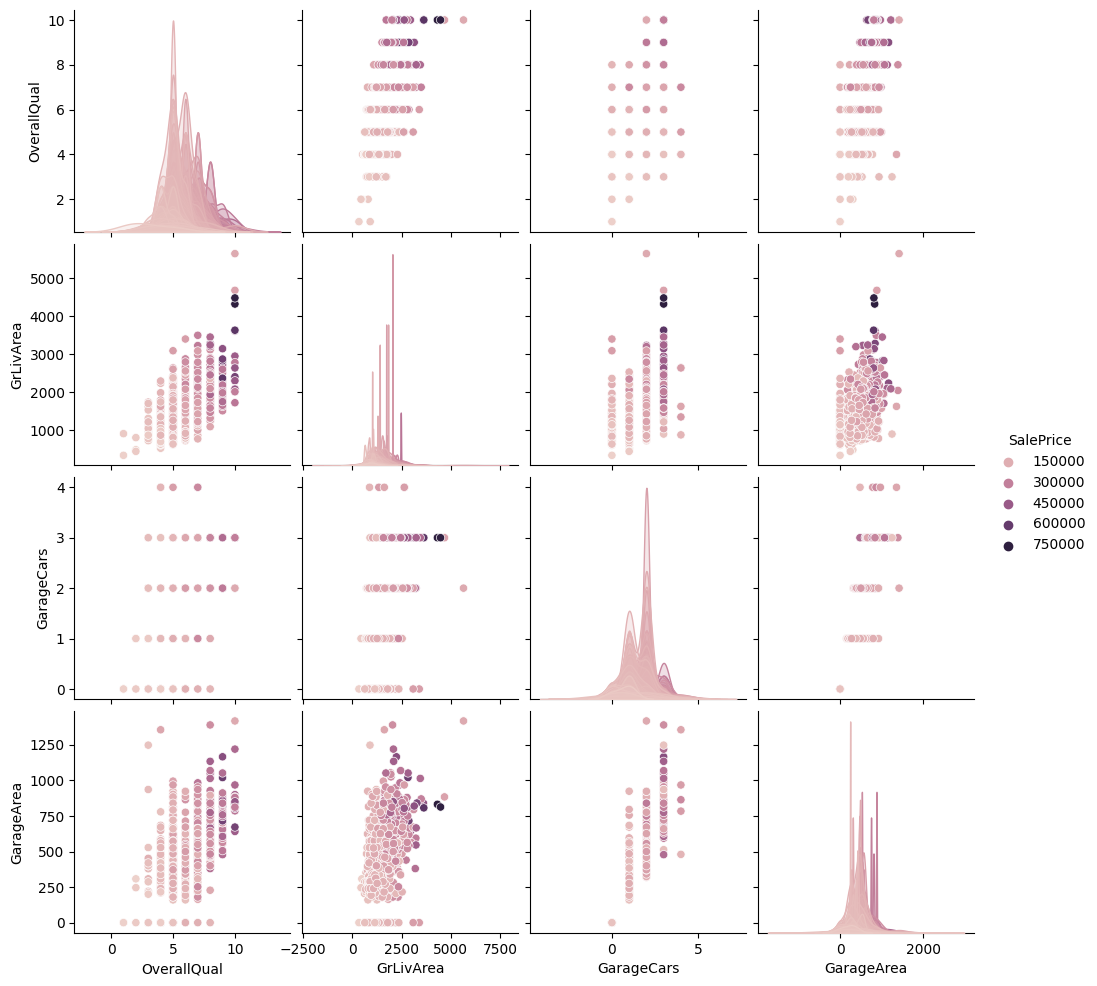

In [19]:
sns.pairplot(data = train, vars = ['OverallQual', 'GrLivArea','GarageCars', 'GarageArea'], hue= 'SalePrice')
plt.show()

The pair plot reveals that the selected features, `OverallQual`, `GrLivArea`, `GarageCars`, and `GarageArea`, exhibit a positive correlation with `SalePrice`. This suggests that they are likely to be important predictors in the machine learning model.

However, before modeling, it is crucial to understand the distribution of the target variable `SalePrice`. Understanding the distribution helps identify:
* Skewness or non-normality
* Outliers
* The need for log transformation or other normalization techniques

To visualize the distribution of `SalePrice`, I will create a histogram.

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


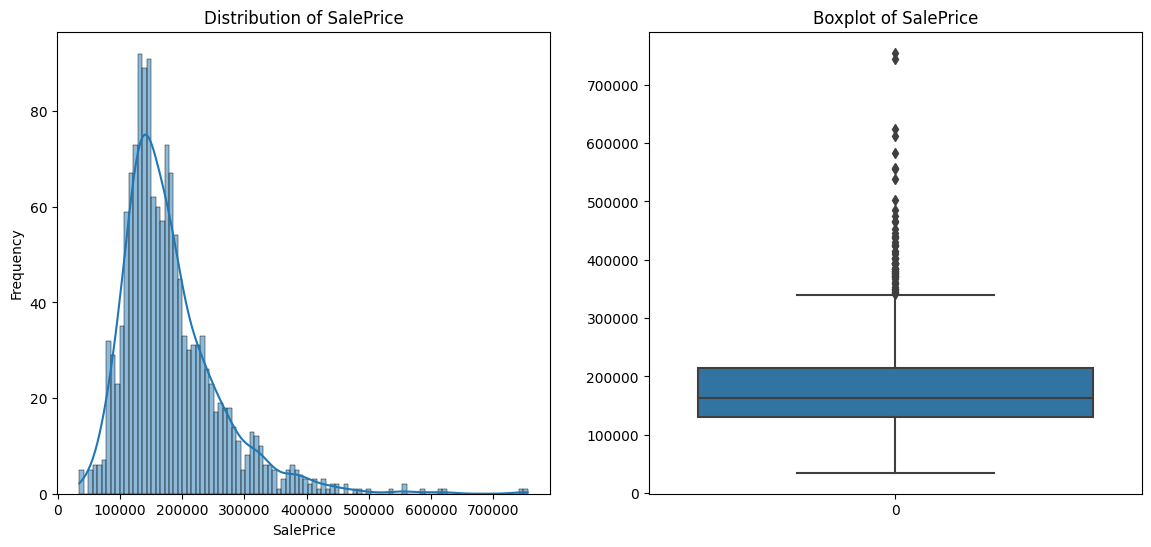

In [20]:
# Distribution of sale price
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.histplot(train['SalePrice'], kde =True, bins = 100)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
sns.boxplot(train["SalePrice"])
plt.title("Boxplot of SalePrice")

plt.show()

The histogram and boxplot of SalePrice reveal that the majority of house prices are **concentrated between approximately 150,000 and 220,000**. This indicates that the distribution is right-skewed, with a relatively small number of properties exhibiting significantly higher sale prices.

These high-value observations can be considered outliers, and they warrant special attention. Outliers may:
* Influence the mean and variance of the target variable
* Impact model training and evaluation
* Reveal important patterns or unique property features

Therefore, in this project, it will be important to **analyze and understand the factors contributing to high sale prices**, as this can improve the accuracy and interpretability of the predictive model.

## Step 3: Feature Engineering

In this section, I will create new features to enhance the predictive power of the machine learning model. Feature engineering allows us to extract more meaningful information from the existing variables and improve model performance.

The following new features will be created:
1. `HouseAge`: Represents the age of the house by calculating the difference between the year sold and the year built.
2. `YearSinceRemodel`: Captures the time since the last remodeling by calculating the difference between the year sold and the year remodeled.
3. `TotalSF`: Represents the total square footage of the property by summing the basement, first-floor, and second-floor areas.

In [21]:
# Copy all data
all2_fe = all.copy()

In [22]:
# House age at time of sale
all2_fe['HouseAge'] = all2_fe['YrSold'] - all2_fe['YearBuilt']
# Years since remodel
all2_fe['YearSinceRemodel'] = all2_fe['YrSold'] - all2_fe['YearRemodAdd']
# Total square footage including basement
all2_fe['TotalSF'] = all2_fe['TotalBsmtSF'] + all2_fe['1stFlrSF'] + all2_fe['2ndFlrSF']

In [23]:
#Check the shape of data
all2_fe.shape

(2919, 84)

Following the creation of the new features `HouseAge`, `YearSinceRemodel`, and `TotalSF`, the updated dataset now contains 84 columns, which is three more than the original feature set.

This confirms that the feature engineering step was successfully executed, and the newly added variables are now integrated into the dataset for use in model training.

These new features are expected to enhance the model's ability to capture important patterns related to property age, renovation history, and overall size, factors that are likely to influence housing prices.

In [24]:
# Split into train and test
train = all2_fe[:len(train)]
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseAge,YearSinceRemodel,TotalSF
0,1,60,3,65.0,8450,1,2,3,3,0,...,4,0,2,2008,8,4,208500.0,5,5,2566.0
1,2,20,3,80.0,9600,1,2,3,3,0,...,4,0,5,2007,8,4,181500.0,31,31,2524.0
2,3,60,3,68.0,11250,1,2,0,3,0,...,4,0,9,2008,8,4,223500.0,7,6,2706.0
3,4,70,3,60.0,9550,1,2,0,3,0,...,4,0,2,2006,8,0,140000.0,91,36,2473.0
4,5,60,3,84.0,14260,1,2,0,3,0,...,4,0,12,2008,8,4,250000.0,8,8,3343.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,2,3,3,0,...,4,0,8,2007,8,4,175000.0,8,7,2600.0
1456,1457,20,3,85.0,13175,1,2,3,3,0,...,4,0,2,2010,8,4,210000.0,32,22,3615.0
1457,1458,70,3,66.0,9042,1,2,3,3,0,...,2,2500,5,2010,8,4,266500.0,69,4,3492.0
1458,1459,20,3,68.0,9717,1,2,3,3,0,...,4,0,4,2010,8,4,142125.0,60,14,2156.0


In [25]:
test = all2_fe[len(train):]
test = test.drop('SalePrice', axis = 1)
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HouseAge,YearSinceRemodel,TotalSF
0,1461,20,2,80.0,11622,1,2,3,3,0,...,2,4,0,6,2010,8,4,49,49,1778.0
1,1462,20,3,81.0,14267,1,2,0,3,0,...,4,0,12500,6,2010,8,4,52,52,2658.0
2,1463,60,3,74.0,13830,1,2,0,3,0,...,2,4,0,3,2010,8,4,13,12,2557.0
3,1464,60,3,78.0,9978,1,2,0,3,0,...,4,4,0,6,2010,8,4,12,12,2530.0
4,1465,120,3,43.0,5005,1,2,0,1,0,...,4,4,0,1,2010,8,4,18,18,2560.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,4,21.0,1936,1,2,3,3,0,...,4,4,0,6,2006,8,4,36,36,1638.0
1455,2916,160,4,21.0,1894,1,2,3,3,0,...,4,4,0,4,2006,8,0,36,36,1638.0
1456,2917,20,3,160.0,20000,1,2,3,3,0,...,4,4,0,9,2006,8,0,46,10,2448.0
1457,2918,85,3,62.0,10441,1,2,3,3,0,...,2,2,700,7,2006,8,4,14,14,1882.0


Since I made new columns, I need to update both the train and test datasets again.

## Model Building and Evaluations

With all preprocessing steps and feature engineering completed, I am now ready to begin building a machine learning model to predict `SalePrice` in the test dataset.

Before training the model, I need to:
1. Rebuild the feature matrix (X) and the target vector (y) from the updated training dataset.
2. Split this data into a training set and a validation set using train_test_split from sklearn.model_selection.

The validation set will allow me to evaluate the model's performance on unseen data before applying it to the final test set.

In [26]:
X = train.drop('SalePrice', axis = 1)
y = train['SalePrice']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

To begin the modeling process, I will first implement a Linear Regression model. Linear regression serves as a baseline model to evaluate how well the current set of features can predict  `SalePrice`. It is a simple yet effective algorithm that models the linear relationship between the features and the target variable.

This step helps:
1. Establish an initial benchmark for model performance.
2. Identify any major issues in the data.
3. Provide interpretability regarding the influence of each feature.

In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

First, we make predictions using the trained Linear Regression model. To evaluate the model's performance on the testing data, we use the  `score()` method, which returns the coefficient of determination (R-squared score). This metric indicates how well the model explains the variability of the target variable in the test set.

In [28]:
# Prediction

LRpredictions = model.predict(X_test)

In [29]:
LRR2 = model.score(X_train, y_train)

In addition, we evaluate the model's performance using other metrics beyond the R-squared score. Specifically, we compute the **Mean Absolute Error (MAE)** and **Mean Squared Error (MSE)** to gain further insight into the model's prediction accuracy. These metrics help quantify the average magnitude of errors in the predictions:

- **MAE** provides the average absolute difference between predicted and actual values.
- **MSE** penalizes larger errors more heavily by squaring the differences before averaging.

These metrics offer a more comprehensive evaluation of the model's effectiveness.ness.

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [56]:
LRmae = mean_absolute_error(y_test, LRpredictions)
LRmsqe = mean_squared_error(y_test, LRpredictions)
LRR2 = r2_score(y_test, LRpredictions)

Before proceeding with further model development, we define a reusable function named  `modeleval ` to evaluate the performance of each model. This function will calculate and display the following evaluation metrics:

- **R-squared (R²) Score** – Indicates how well the model explains the variability of the target variable.
- **Mean Absolute Error (MAE)** – Measures the average magnitude of errors in the predictions.
- **Mean Squared Error (MSE)** – Measures the average squared difference between predicted and actual values, penalizing larger errors more heavily.

This function streamlines the evaluation process and ensures consistent performance comparison across different models.

In [57]:
def modeleval(name, r2, mae, msqe):
    print(f'{name}',
          ': Mean_absolute_error = ', round(mae, 3), 
          ', Mean_squared_error = ',  round(msqe, 3), 
          ', R-squared score:',  (round(r2,3)))

In [58]:
modeleval('Linear Regression', LRR2, LRmae, LRmsqe)

Linear Regression : Mean_absolute_error =  21275.046 , Mean_squared_error =  1151915286.353 , R-squared score: 0.85


The Linear Regression model demonstrates a reasonably strong performance with an **R-squared score of 0.85**, indicating that the model explains a substantial portion of the variance in the target variable. The **Mean Absolute Error (MAE)** of approximately **21,275** suggests that, on average, the model's predictions deviate from the actual values by that amount. Additionally, the **Mean Squared Error (MSE)** reflects the squared magnitude of these deviations.

While the results are promising, there is still room for improvement. In the following sectionsIwe will explore more advanced mode, such as random forest and gradient boosting,ls and compare their performance using the same evaluation metric.


To improve upon the Linear Regression model, we next implement a **Random Forest Regressor** for forecasting the `SalePrice`. Random Forest is an ensemble learning method that builds multiple decision trees and averages their predictions to enhance accuracy and control overfitting.

We begin by importing the `RandomForestRegressor` class from `sklearn.ensemble` and training it on our dataset.

In [59]:
from sklearn.ensemble import RandomForestRegressor

RFmodel = RandomForestRegressor()
RFmodel.fit(X_train, y_train)

RandomForestRegressor()

In [60]:
RFpredictions = RFmodel.predict(X_test)

In [62]:
RFR2 = r2_score(y_test, RFpredictions)
RFmae = mean_absolute_error(y_test, RFpredictions)
RFmsqe = mean_squared_error(y_test, RFpredictions)

In [63]:
modeleval('Random Forest', RFR2, RFmae, RFmsqe)

Random Forest : Mean_absolute_error =  17247.702 , Mean_squared_error =  837792539.726 , R-squared score: 0.891


he updated Random Forest Regressor results are as follows:

- **R² Score:** 0.891  
- **Mean Absolute Error (MAE):** 17,247.70  
- **Mean Squared Error (MSE):** 837,792,539.73

The model achieves a solid **R² score of 0.891**, meaning it explains approximately 89.1% of the variance in the target variable. The **MAE** and **MSE** values remain reasonably low, indicating that the model maintains good predictive accuracy.

While the performance is strong, the slight drop in R² compared to earlier runs may suggest variability due to data splits or model settings. Additional tuning, such as adjusting the number of trees or max depth, or applying cross-validation, may help optimize the model further.formance.

While the Random Forest Regressor shows excellent performance on the test data, it is crucial to verify whether the model is overfitting. Overfitting occurs when a model
performs well on training data but fails to generalize to unseen data.

To evaluate this, we compare the model's performance on both the **training set** and the **test set**. A significant gap in accuracy (or error metrics) between the t
o can indicate overfitting.

We will calculthe R-squarede R² score, Mean Absolute Error, and Mean Squared Error on the training data and compare them with the test set results.

In [66]:
# Check overfitting

RF_train_predictions = RFmodel.predict(X_train)

RFR2_train = r2_score(y_train, RF_train_predictions)
mae_train = mean_absolute_error(y_train, RF_train_predictions)
mse_train = mean_squared_error(y_train, RF_train_predictions)

In [68]:
modeleval('Random Forest Training: ', RFR2_train, mae_train, mse_train)

Random Forest Training:  : Mean_absolute_error =  6329.577 , Mean_squared_error =  122848192.734 , R-squared score: 0.979


To determine if the Random Forest model is overfitting, we compared performance on both training and testing datasets:

- **Training Set:**
  - R² Score: 0.979
  - MAE: 6,329.58
  - MSE: 122,848,192.73

- **Testing Set:**
  - R² Score: 0.891
  - MAE: 17,247.70
  - MSE: 837,792,539.73

The model shows excellent performance on the training data but noticeably worse results on the testing set. The significant gap between training and testing R² scores, along with the increase in error metrics, indicates that the model is likely overfitting.

To reduce overfitting, we can consider:
- Limiting tree depth (`max_depth`)
- Increasing minimum samples per split (`min_samples_split`)
- Reducing the number of estimators (`n_estimators`)
- Using cross-validation for more robust perlidation!











In [73]:
from sklearn.model_selection import cross_val_score

rf_tuned = RandomForestRegressor(n_estimators = 100, max_depth = 10, min_samples_split = 10, min_samples_leaf = 4, random_state = 42)

rf_tuned.fit(X_train, y_train)

cv_scores = cross_val_score(rf_tuned, X_train, y_train, cv=5, scoring='r2')

y_pred = rf_tuned.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [74]:
modeleval('Random Forest 2nd version Testing data:', r2, mae, mse)

Random Forest 2nd version Testing data: : Mean_absolute_error =  18279.651 , Mean_squared_error =  980734815.629 , R-squared score: 0.872


As part of evaluating the tuned Random Forest model's performance, it is essential to determine whether the model is overfitting. Overfitting occurs when a model performs exceptionally well on training data but poorly on unseen (test) data, indicating that it has learned noise rather than general patterns.

In [76]:
y_train_pred = rf_tuned.predict(X_train)

train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

In [77]:
modeleval('Random Forest 2nd version for Training data', train_r2, train_mae, train_mse)

Random Forest 2nd version for Training data : Mean_absolute_error =  10291.556 , Mean_squared_error =  330491009.376 , R-squared score: 0.945


To evaluate the tuned Random Forest model's generalization ability, we compared performance on both training and testing datasets.

* **Training Set**:
    * R² Score: 0.945
    * MAE: 10,291.56
    * MSE: 330,491,009.38

* **Testing Set**:
    * R² Score: 0.872
    * MAE: 18,279.65
    * MSE: 980,734,815.63

**Interpretation**:
The model shows a strong fit on the training data, but the performance on the test set is notably worse. This gap indicates that the model is **still overfitting**, although the regularization steps have reduced the severity compared to the original model.

## Visualization

In this section, we create visualizations to better understand the model’s performance and extract insights that can improve forecasting accuracy for the `SalePrice` in the test dataset.

These visual tools will help:
- Identify patterns or trends in the residuals (prediction errors)
- Compare predicted vs. actual sale prices
- Detect potential outliers or model weaknesses
- Visualize feature importance to understand key drivers of house prices

By examining both the predictions and the underlying data visually, we can assess how well the model generalizes and identify areas for further refinement.

In [79]:
# Make a dictionary about predictions

models = {"Linear Regression": LRpredictions,
          "Random Forest": y_pred}

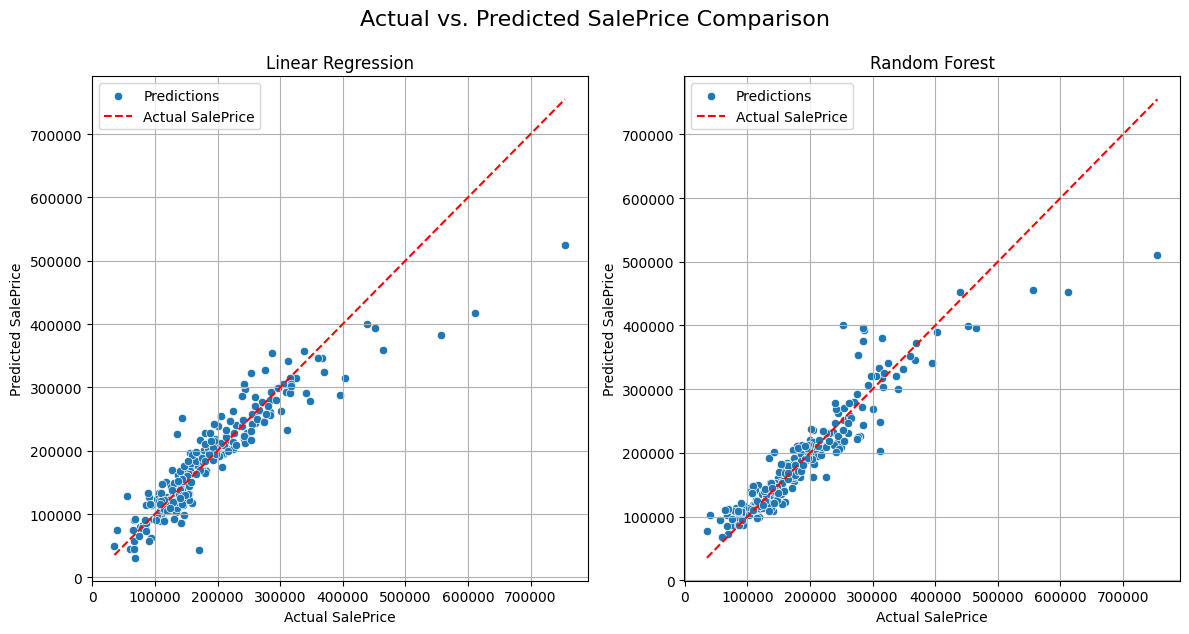

In [82]:
# Create subplots 
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Red dashed line range
min_val = y_test.min()
max_val = y_test.max()

# Loop through models and plot on subplots
for ax, (name, preds) in zip(axes, models.items()):
    sns.scatterplot(x = y_test.values, y = preds, ax = ax, label = 'Predictions')
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', label = 'Actual SalePrice')
    ax.set_xlabel("Actual SalePrice")
    ax.set_ylabel("Predicted SalePrice")
    ax.set_title(name)
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.suptitle("Actual vs. Predicted SalePrice Comparison", fontsize=16, y=1.05)
plt.show()

The comparison plot illustrates the performance of Linear Regression and Random Forest models in predicting house sale prices.
- **Linear Regression** shows a generally strong trend, but with a wider spread of residuals. It tends to underpredict high-priced homes and overpredict some low-priced ones, suggesting it struggles with capturing complex, nonlinear relationships in the dat

- **Random Forest**, on the other hand, aligns more closely with the ideal prediction line. The scatter of predictions is tighter, particularly in the mid-range price zone. This indicates that the model handles nonlinearity and interactions among features more effectively than Linear Regression.

Overall, the Random Forest model provides more accurate and reliable predictions, as confirmed by both visual assessment and numerical evaluation metrics.

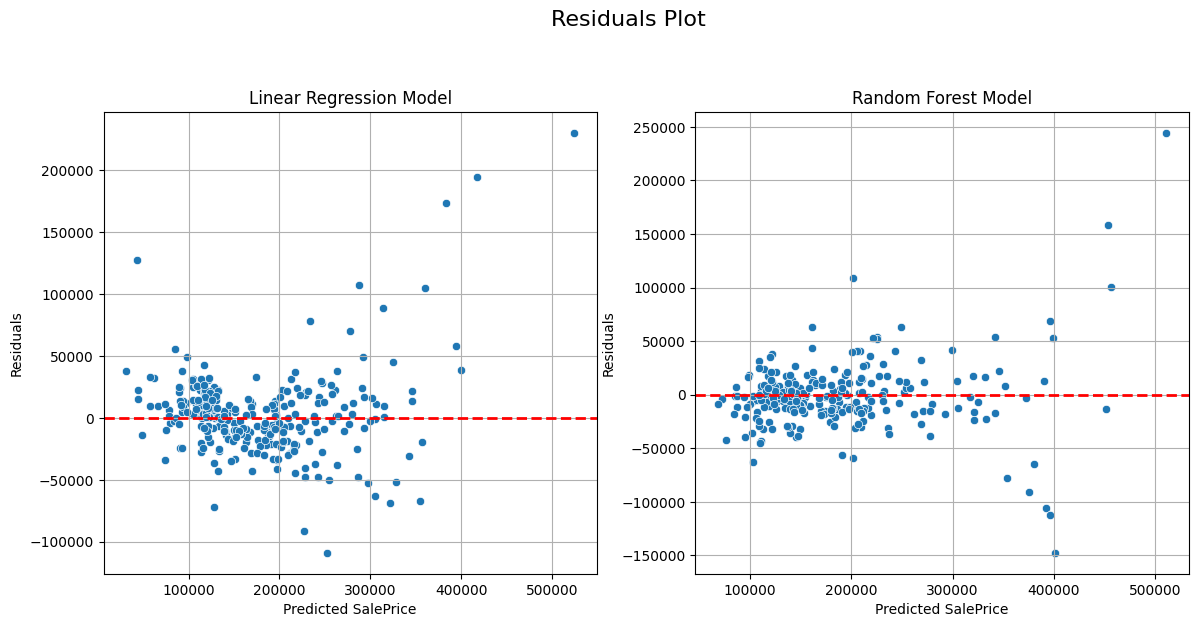

In [88]:
# Residuals
LRresiduals = y_test - LRpredictions
RFresiduals = y_test - y_pred

# Plot
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
sns.scatterplot(x= LRpredictions, y=LRresiduals)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Linear Regression Model')
plt.grid(True)

plt.subplot(1,2,2)
sns.scatterplot(x=y_pred, y=RFresiduals)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Random Forest Model')
plt.grid(True)

plt.suptitle("Residuals Plot", fontsize=16, y=1.05)
plt.show()

Residual plots are used to visualize the distribution of prediction errors. A well-performing model should show residuals randomly scattered around zero without clear patterns.
- **Linear Regression**: The residuals show a distinct pattern and increasing variance with higher predicted prices. This indicates model underfitting and poor ability to capture complex, nonlinear relationships. Large residuals suggest frequent over- or under-predictions for certain price ranges
- **Random Forest**: The residuals are more evenly and randomly distributed around zero, with fewer extreme outliers. This indicates better generalization and a more accurate fit across the range of predicted values.

Overall, the Random Forest model demonstrates superior error behavior, reinforcing earlier evaluation results.

## Conclusion

In this section, we generate final predictions for the `SalePrice` using the trained models. Although the Random Forest model has demonstrated better performance compared to the Linear Regression model in previous evaluations, we will review and compare the predictions from both models.

This comparison allows us to:
- Visualize how each model performs on unseen data
- Identify differences in prediction behavior
- Evaluate the consistency and reliability of the forecasts

By analyzing both sets of predictions, we can confirm the robustness of the Random Forest model while understanding the limitations of the simpler Linear Regression approach.

In [92]:
# Linear regression model
test_preds = model.predict(test)

In [93]:
results = pd.DataFrame({"Id": test['Id'], "SalePrice" : test_preds})
results

,Id,SalePrice
0,1461,106598.189052
1,1462,147305.280212
2,1463,164087.718122
3,1464,178615.241178
4,1465,189946.978920
...,...,...
1454,2915,73823.144706
1455,2916,57053.347838
1456,2917,152585.523319
1457,2918,116948.458044


In [94]:
# Random Forest model
RF_test_preds = RFmodel.predict(test)

RFresults = pd.DataFrame({'Id': test['Id'], 'SalePrice': RF_test_preds})
RFresults

,Id,SalePrice
0,1461,125044.00
1,1462,157090.50
2,1463,178581.08
3,1464,184361.83
4,1465,205336.39
...,...,...
1454,2915,95305.54
1455,2916,94721.54
1456,2917,172444.20
1457,2918,121597.54


Although the Random Forest model demonstrated higher accuracy during training, the evaluation revealed signs of overfitting — with significantly better performance on training data than on the test set. This indicates that the model may not generalize well to unseen data.

In contrast, the Linear Regression model, while simpler, showed more stable and generalizable performance across both training and testing datasets. The residual analysis and predicted vs. actual plots further support this, as Linear Regression exhibited more consistent prediction behavior without extreme variance.
🔎 **Recommendation**:  
For this project, the **Linear Regression model** is recommended for predicting `SalePrice`, as it provides a better balance between accuracy and generalizabili

📌 **Future Improvements**:  
To further enhance model performance and avoid overfitting, future work could explore additional machine learning models such as:
- **Gradient Boosting**
- **XGBoost**
- **Support Vector Regression**
- **Regularized models** like Ridge or Lasso Regression

These approaches may offer improved accuracy while maintaining better generalization than Random Forest in this context.

These results suggest that in real-world housing price forecasting, simpler models like Linear Regression can often provide more reliable and generalizable predictions than complex models like Random Forest, especially when data is limited or overfitting is a concern. Choosing a model that balances accuracy with robustness is crucial for making dependable pricing decisions in real estate.
